In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [34]:
cortices = [[0, 38],
            [38, 73],
            [73, 98],
            [98, 119],
            [119, 139],
            [139, 152],
            [152, 164],
            [164, 175],
            [175, 186],
            [186, 195],
            [195, 203],
            [203, 210],
            [210, 213]]

In [3]:
data = pd.read_excel("../connectomes/mouse.xlsx", sheet_name=None)
metadata = pd.read_excel("../connectomes/mouse_meta.xlsx", sheet_name=None)

d = data["W_ipsi"]
p = data["PValue_ipsi"]

In [26]:
m = metadata["Voxel Count_295 Structures"]
m = m.loc[m["Represented in Linear Model Matrix"] == "Yes"]

In [42]:
m

,ID,Ontology order,Acronym,Name,Major Region,Voxel Count,Structure Hit with rAAV?,Primary Inj Site,Secondary Inj Site,Represented in Linear Model Matrix
0,672,496,CP,Caudoputamen,Striatum,23893,Yes,Yes,NaN,Yes
1,507,314,MOB,Main olfactory bulb,Olfactory Areas,16978,Yes,Yes,NaN,Yes
2,961,350,PIR,Piriform area,Olfactory Areas,12933,Yes,Yes,NaN,Yes
3,985,16,MOp,Primary motor area,Isocortex,11760,Yes,Yes,NaN,Yes
4,329,49,SSp-bfd,"Primary somatosensory area, barrel field",Isocortex,10306,Yes,Yes,NaN,Yes
5,993,22,MOs,Secondary motor area,Isocortex,10098,Yes,Yes,NaN,Yes
6,1017,954,AN,Ansiform lobule,Cerebellar Cortex,9044,Yes,Yes,NaN,Yes
7,918,428,ENTl,"Entorhinal area, lateral part",Hippocampal Formation,8409,Yes,Yes,NaN,Yes
8,382,391,CA1,Field CA1,Hippocampal Formation,8275,Yes,Yes,NaN,Yes
9,294,735,SCm,"Superior colliculus, motor related",Midbrain,6779,Yes,Yes,NaN,Yes


In [59]:
columns = []
for region in ["Isocortex",
               "Olfactory Areas",
               "Hippocampal Formation",
               "Cortical Subplate",
               "Striatum",
               "Pallidum",
               "Thalamus",
               "Hypothalamus",
               "Midbrain",
               "Pons",
               "Medulla",
               "Cerebellar Cortex",
               "Cerebellar Nuclei"]:# m["Major Region"].unique():
    print(region)
    [columns.append(acronym) for acronym in m.loc[m["Major Region"] == region, "Acronym"].values]

Isocortex
Olfactory Areas
Hippocampal Formation
Cortical Subplate
Striatum
Pallidum
Thalamus
Hypothalamus
Midbrain
Pons
Medulla
Cerebellar Cortex
Cerebellar Nuclei


In [60]:
uhh = pd.read_excel("/Users/hmmitche/Downloads/nature13186-s2.xlsx", sheet_name=None)

In [61]:
u1 = uhh["voxel_count_all ARA"]

In [62]:
u1[u1["acronym"] == "CB"]

,id,final selection,ontology order,acronym,name,voxel count
898,512,0,900,CB,Cerebellum,43963


In [63]:
d.columns = columns
d.index = columns

In [64]:
d.head()

,MOp,SSp-bfd,MOs,VISp,SSs,SSp-ul,SSp-tr,RSPv,TEa,PTLp,...,PFL,SIM,CENT,PRM,FL,NOD,PYR,IP,FN,DN
MOp,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.094305,0.000000,0.0,...,0.000000,0.000085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113436,0.0
SSp-bfd,0.000532,1.550082,0.949079,0.152291,0.009530,0.000000,0.023817,0.015710,0.043939,0.0,...,0.700777,0.028479,0.031157,0.091221,0.000000,0.038712,0.043113,0.000000,0.097992,0.0
MOs,0.000000,0.000000,0.315885,0.000000,0.007936,0.018708,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.054074,0.000000,0.000000,0.000000,0.000376,0.023704,0.0
VISp,0.021439,0.000000,0.000000,0.074183,0.000000,0.022876,0.000000,0.000000,0.009049,0.0,...,0.000000,0.000000,0.000000,0.000000,0.005774,0.000612,0.003241,0.000000,0.042548,0.0
SSs,0.000000,0.000000,1.640534,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007034,0.0


In [65]:
n = d.values.copy()

n[d <= 1e-4] = 0
n[(1e-4 <= d) & (1e-2 > d)] = 1
n[(1e-2 <= d) & (1e-1 > d)] = 2
n[(1e-1 <= d)] = 3

In [66]:
cortex_mask = np.zeros_like(n)
for i, cortex in enumerate(cortices):
    cortex_mask[cortex[0]:cortex[1], cortex[0]:cortex[1]] += i + 1
G1 = n.copy()
G1[cortex_mask == 0] = 0
G2 = n.copy()
G2[cortex_mask != 0] = 0
events = [lambda t_in, y_in, i=i: event(t_in, y_in, i) for i in range(n.shape[0])]
for e in events:
    e.direction = 1.0

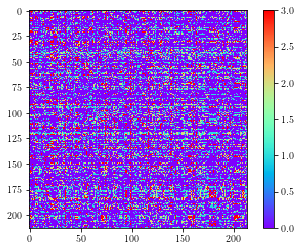

In [69]:
plt.imshow(n)
plt.colorbar()